In [1]:
#Importamos librerías
import pandas as pd
import numpy as np

In [184]:
#Importamos el dataframe
df_data =  pd.read_csv("https://raw.githubusercontent.com/RexTime007/Mobile-App-for-MSL-detection/main/Experimentaci%C3%B3n/Experimentaciones.csv?token=GHSAT0AAAAAAB6F6SSATZZLKTCJRTGOOKWEZC26OHQ", encoding='latin-1')

In [185]:
#Ver si se importó correctamente
df_data.columns

Index(['SEÑA ESPERADA', 'HUAWEI/5001', 'DISTANCIA TOTAL', '#INCIDENCIAS',
       'FALSAS', 'SAMSUNG-B/5000', 'DISTANCIA TOTAL.1', '#INCIDENCIAS.1',
       'FALSAS.1', 'S8/5003', 'DISTANCIA TOTAL.2', '#INCIDENCIAS.2',
       'FALSAS.2'],
      dtype='object')

# **Limpieza de datos**

In [186]:
df_data

,SEÑA ESPERADA,HUAWEI/5001,DISTANCIA TOTAL,#INCIDENCIAS,FALSAS,SAMSUNG-B/5000,DISTANCIA TOTAL.1,#INCIDENCIAS.1,FALSAS.1,S8/5003,DISTANCIA TOTAL.2,#INCIDENCIAS.2,FALSAS.2
0,A,A,101035.253,10,E/S/T,A,82784.400,9,E/S,A,95536.649,9,E/S
1,B,B,49944.526,7,HLA/M/MAL,MAL,58226.443,6,"F/HLA/MAL,M",B,47404.962,5,F/HLA/M/MAL
2,BN,BN,124366.082,10,B/HLA/Ñ,BN,72196.465,6,BN/HLA/M/MAL,BN,110718.608,9,B/HLA/MAL/Ñ
3,C,MAL,45136.491,6,M/C/O/Ñ,C,41490.844,7,M/MAL/O/Ñ,C,74211.369,8,M/MAL/O/Ñ
4,CME,CME,403691.071,13,-,CME,288530.549,12,B,CME,390964.694,13,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,X,YO,56143.762,5,G/O/TU/X,X,40681.516,3,G/P/Q/TU/YO/Z,X,21725.346,6,G/Q/TU/YO
181,Y,Y,104518.627,8,PDN,Y,87548.649,8,PDN,Y,77305.532,7,PDN
182,YO,YO,166322.628,12,TU,YO,137220.826,12,TU,YO,177318.254,13,-
183,Z,Z,97588.035,7,D/I/K/R,Z,69043.545,5,D/I/K/NO/R/TU/YO,Z,103009.492,7,D/I/K/L/R


In [242]:
df_acc = df_data.copy()

In [243]:
# Concatenar las columnas y asignar nombre a la columna resultante
cm_general = pd.concat([df_data['S8/5003'], df_data['SAMSUNG-B/5000'], df_data['HUAWEI/5001']], axis=0, names=['RESULTANTES'], ignore_index=True)

In [244]:
cm_general = pd.DataFrame(cm_general)

In [245]:
cm_general.rename(columns={0:'RESULTANTES'})

,RESULTANTES
0,A
1,B
2,BN
3,C
4,CME
...,...
550,YO
551,Y
552,YO
553,Z


In [246]:
cm_general2 = pd.concat([df_data['SEÑA ESPERADA'],df_data['SEÑA ESPERADA'],df_data['SEÑA ESPERADA']])

In [247]:
cm_general2 =  pd.DataFrame(cm_general2)

In [248]:
cm_general2

,SEÑA ESPERADA
0,A
1,B
2,BN
3,C
4,CME
...,...
180,X
181,Y
182,YO
183,Z


In [249]:
cm_general2['RESULTANTES'] = cm_general

In [250]:
cm_general2

,SEÑA ESPERADA,RESULTANTES
0,A,A
1,B,B
2,BN,BN
3,C,C
4,CME,CME
...,...,...
180,X,X
181,Y,Y
182,YO,YO
183,Z,Z


In [251]:
signTypes = [0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,1,0,1,0,0,1,1,0,0,1,0,1,0,0,0,1,0,1,1,1]

In [252]:
cm_general2.shape

(555, 2)

In [253]:
dd = pd.DataFrame()
dd['Tipo']=signTypes * 15

In [254]:
cm_general2['Tipo'] = dd

In [255]:
df_sorted = cm_general2.sort_values('Tipo')

In [256]:
df_sorted

,SEÑA ESPERADA,RESULTANTES,Tipo
0,A,A,0
144,Y,Y,0
142,W,M,0
141,V,V,0
140,U,U,0
...,...,...,...
124,J,I,1
150,BN,BN,1
125,K,K,1
157,GRA,GRA,1


In [257]:
df = pd.DataFrame(df_sorted)

In [259]:
estaticas = df[df['Tipo']== 0]
dinamicas = df[df['Tipo']== 1]

In [260]:
estaticas

,SEÑA ESPERADA,RESULTANTES,Tipo
0,A,A,0
144,Y,Y,0
142,W,M,0
141,V,V,0
140,U,U,0
...,...,...,...
178,V,V,0
24,R,R,0
92,N,N,0
177,U,U,0


In [261]:
dinamicas

,SEÑA ESPERADA,RESULTANTES,Tipo
83,GRA,GRA,1
85,HLA,HLA,1
78,CME,CME,1
69,X,Q,1
71,YO,YO,1
...,...,...,...
124,J,I,1
150,BN,BN,1
125,K,K,1
157,GRA,GRA,1


In [262]:
#Reasignar valores de caracteres no usables
df_data[["FALSAS", "FALSAS.1", "FALSAS.2"]] = df_data[["FALSAS", "FALSAS.1", "FALSAS.2"]].replace("-", "0")
df_data

,SEÑA ESPERADA,HUAWEI/5001,DISTANCIA TOTAL,#INCIDENCIAS,FALSAS,SAMSUNG-B/5000,DISTANCIA TOTAL.1,#INCIDENCIAS.1,FALSAS.1,S8/5003,DISTANCIA TOTAL.2,#INCIDENCIAS.2,FALSAS.2
0,A,A,101035.253,10,E/S/T,A,82784.400,9,E/S,A,95536.649,9,E/S
1,B,B,49944.526,7,HLA/M/MAL,MAL,58226.443,6,"F/HLA/MAL,M",B,47404.962,5,F/HLA/M/MAL
2,BN,BN,124366.082,10,B/HLA/Ñ,BN,72196.465,6,BN/HLA/M/MAL,BN,110718.608,9,B/HLA/MAL/Ñ
3,C,MAL,45136.491,6,M/C/O/Ñ,C,41490.844,7,M/MAL/O/Ñ,C,74211.369,8,M/MAL/O/Ñ
4,CME,CME,403691.071,13,0,CME,288530.549,12,B,CME,390964.694,13,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,X,YO,56143.762,5,G/O/TU/X,X,40681.516,3,G/P/Q/TU/YO/Z,X,21725.346,6,G/Q/TU/YO
181,Y,Y,104518.627,8,PDN,Y,87548.649,8,PDN,Y,77305.532,7,PDN
182,YO,YO,166322.628,12,TU,YO,137220.826,12,TU,YO,177318.254,13,0
183,Z,Z,97588.035,7,D/I/K/R,Z,69043.545,5,D/I/K/NO/R/TU/YO,Z,103009.492,7,D/I/K/L/R


In [263]:
#Primera parte pedida, cambiar los valores a 0 y 1
df_data['HUAWEI/5001'] = df_data.apply(lambda row: 1 if row['SEÑA ESPERADA'] == row['HUAWEI/5001'] else 0, axis=1)
df_data['SAMSUNG-B/5000'] = df_data.apply(lambda row: 1 if row['SEÑA ESPERADA'] == row['SAMSUNG-B/5000'] else 0, axis=1)
df_data['S8/5003'] = df_data.apply(lambda row: 1 if row['SEÑA ESPERADA'] == row['S8/5003'] else 0, axis=1)

In [264]:
df_data

,SEÑA ESPERADA,HUAWEI/5001,DISTANCIA TOTAL,#INCIDENCIAS,FALSAS,SAMSUNG-B/5000,DISTANCIA TOTAL.1,#INCIDENCIAS.1,FALSAS.1,S8/5003,DISTANCIA TOTAL.2,#INCIDENCIAS.2,FALSAS.2
0,A,1,101035.253,10,E/S/T,1,82784.400,9,E/S,1,95536.649,9,E/S
1,B,1,49944.526,7,HLA/M/MAL,0,58226.443,6,"F/HLA/MAL,M",1,47404.962,5,F/HLA/M/MAL
2,BN,1,124366.082,10,B/HLA/Ñ,1,72196.465,6,BN/HLA/M/MAL,1,110718.608,9,B/HLA/MAL/Ñ
3,C,0,45136.491,6,M/C/O/Ñ,1,41490.844,7,M/MAL/O/Ñ,1,74211.369,8,M/MAL/O/Ñ
4,CME,1,403691.071,13,0,1,288530.549,12,B,1,390964.694,13,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,X,0,56143.762,5,G/O/TU/X,1,40681.516,3,G/P/Q/TU/YO/Z,1,21725.346,6,G/Q/TU/YO
181,Y,1,104518.627,8,PDN,1,87548.649,8,PDN,1,77305.532,7,PDN
182,YO,1,166322.628,12,TU,1,137220.826,12,TU,1,177318.254,13,0
183,Z,1,97588.035,7,D/I/K/R,1,69043.545,5,D/I/K/NO/R/TU/YO,1,103009.492,7,D/I/K/L/R


In [265]:
#Guardamos los datos por si acaso
df_data.to_csv("data_generated.csv", encoding='latin-1')

# **Experimentación**

In [266]:
#Importamos librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import  crosstab

In [267]:
#Importamos los csv
df2 =  pd.read_csv("data_generated.csv", encoding='latin-1')
df = pd.read_csv("https://raw.githubusercontent.com/RexTime007/Mobile-App-for-MSL-detection/main/Experimentaci%C3%B3n/Experimentaciones.csv?token=GHSAT0AAAAAAB6F6SSATZZLKTCJRTGOOKWEZC26OHQ", encoding='latin-1')

In [268]:
df2.drop(columns='Unnamed: 0', inplace=True)

In [269]:
#Precisión Huawei
Huawei = df2['HUAWEI/5001'].value_counts()
sum_huawei = Huawei[0] + Huawei[1]
accuracyHuawei = Huawei[1] / sum_huawei
#print(Huawei)
print("Accuracy: {:.2f}".format(accuracyHuawei))

Accuracy: 0.82


In [270]:
#Precisión S8
Samsung_S8 = df2['S8/5003'].value_counts()
sum_s8 = Samsung_S8[0] + Samsung_S8[1]
accuracyS8 = Samsung_S8[1] / sum_s8
#print(Samsung_S8)
print("Accuracy: {:.2f}".format(accuracyS8))

Accuracy: 0.80


In [271]:
#Precisión A32
Samsung_A32 = df2['SAMSUNG-B/5000'].value_counts()
sum_A32 = Samsung_A32[0] + Samsung_A32[1]
accuracyA32 = Samsung_A32[1] / sum_A32
#print(Samsung_A32)
print("Accuracy: {:.2f}".format(accuracyA32))

Accuracy: 0.80


In [272]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
print( accuracy_score(df['SEÑA ESPERADA'].values, df['HUAWEI/5001'].values) )
print( accuracy_score(df['SEÑA ESPERADA'].values, df['SAMSUNG-B/5000'].values) )
print( accuracy_score(df['SEÑA ESPERADA'].values, df['S8/5003'].values) )
## CALCULAR EL RESTO DE LAS METRICAS PARA CLASIFICACION

0.8162162162162162
0.8
0.8


In [144]:
signTypes = [0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,1,0,1,0,0,1,1,0,0,1,0,1,0,0,0,1,0,1,1,1,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,1,0,1,0,0,1,1,0,0,1,0,1,0,0,0,1,0,1,1,1,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,1,0,1,0,0,1,1,0,0,1,0,1,0,0,0,1,0,1,1,1,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,1,0,1,0,0,1,1,0,0,1,0,1,0,0,0,1,0,1,1,1,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,1,0,1,0,0,1,1,0,0,1,0,1,0,0,0,1,0,1,1,1]

In [145]:
df2['Tipo'] = signTypes

In [146]:
df2

,SEÑA ESPERADA,HUAWEI/5001,DISTANCIA TOTAL,#INCIDENCIAS,FALSAS,SAMSUNG-B/5000,DISTANCIA TOTAL.1,#INCIDENCIAS.1,FALSAS.1,S8/5003,DISTANCIA TOTAL.2,#INCIDENCIAS.2,FALSAS.2,Tipo
0,A,1,101035.253,10,E/S/T,1,82784.400,9,E/S,1,95536.649,9,E/S,0
1,B,1,49944.526,7,HLA/M/MAL,0,58226.443,6,"F/HLA/MAL,M",1,47404.962,5,F/HLA/M/MAL,0
2,BN,1,124366.082,10,B/HLA/Ñ,1,72196.465,6,BN/HLA/M/MAL,1,110718.608,9,B/HLA/MAL/Ñ,1
3,C,0,45136.491,6,M/C/O/Ñ,1,41490.844,7,M/MAL/O/Ñ,1,74211.369,8,M/MAL/O/Ñ,0
4,CME,1,403691.071,13,0,1,288530.549,12,B,1,390964.694,13,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,X,0,56143.762,5,G/O/TU/X,1,40681.516,3,G/P/Q/TU/YO/Z,1,21725.346,6,G/Q/TU/YO,1
181,Y,1,104518.627,8,PDN,1,87548.649,8,PDN,1,77305.532,7,PDN,0
182,YO,1,166322.628,12,TU,1,137220.826,12,TU,1,177318.254,13,0,1
183,Z,1,97588.035,7,D/I/K/R,1,69043.545,5,D/I/K/NO/R/TU/YO,1,103009.492,7,D/I/K/L/R,1


In [147]:
# Filtrar las filas según las condiciones especificadas
def contar_filas_con_condiciones(df):
    filtro = (df['HUAWEI/5001'] == 1) & (df['SAMSUNG-B/5000'] == 1) & (df['S8/5003'] == 1)
    filas_filtradas = df[filtro]
    return filas_filtradas

datos_exitosos = pd.DataFrame(contar_filas_con_condiciones(df2))
datos_exitosos.describe()

,HUAWEI/5001,DISTANCIA TOTAL,#INCIDENCIAS,SAMSUNG-B/5000,DISTANCIA TOTAL.1,#INCIDENCIAS.1,S8/5003,DISTANCIA TOTAL.2,#INCIDENCIAS.2,Tipo
count,116.0,116.000000,116.000000,116.0,116.000000,116.000000,116.0,116.000000,116.000000,116.000000
mean,1.0,123985.581196,10.422414,1.0,106495.423934,10.431034,1.0,131926.436410,10.534483,0.310345
std,0.0,73510.225605,2.937467,0.0,53856.316596,2.654689,0.0,76670.687879,2.645525,0.464642
min,1.0,11651.344000,2.000000,1.0,1094.304000,3.000000,1.0,11141.983000,3.000000,0.000000
25%,1.0,83362.604638,8.000000,1.0,78507.570000,8.000000,1.0,94590.004278,8.750000,0.000000
50%,1.0,107797.333500,12.000000,1.0,94550.257550,11.500000,1.0,119790.707500,11.500000,0.000000
75%,1.0,135752.710450,13.000000,1.0,122317.174300,13.000000,1.0,145479.233250,13.000000,1.000000
max,1.0,425154.864500,13.000000,1.0,353108.924000,13.000000,1.0,409472.182300,13.000000,1.000000


In [148]:
general = datos_exitosos.copy()

In [149]:
general.columns

Index(['SEÑA ESPERADA', 'HUAWEI/5001', 'DISTANCIA TOTAL', '#INCIDENCIAS',
       'FALSAS', 'SAMSUNG-B/5000', 'DISTANCIA TOTAL.1', '#INCIDENCIAS.1',
       'FALSAS.1', 'S8/5003', 'DISTANCIA TOTAL.2', '#INCIDENCIAS.2',
       'FALSAS.2', 'Tipo'],
      dtype='object')

In [150]:
general['dist_gral'] = general['DISTANCIA TOTAL.1'] + general['DISTANCIA TOTAL'] + general['DISTANCIA TOTAL.2']

In [151]:
general

,SEÑA ESPERADA,HUAWEI/5001,DISTANCIA TOTAL,#INCIDENCIAS,FALSAS,SAMSUNG-B/5000,DISTANCIA TOTAL.1,#INCIDENCIAS.1,FALSAS.1,S8/5003,DISTANCIA TOTAL.2,#INCIDENCIAS.2,FALSAS.2,Tipo,dist_gral
0,A,1,101035.253,10,E/S/T,1,82784.400,9,E/S,1,95536.649,9,E/S,0,279356.302
2,BN,1,124366.082,10,B/HLA/Ñ,1,72196.465,6,BN/HLA/M/MAL,1,110718.608,9,B/HLA/MAL/Ñ,1,307281.155
4,CME,1,403691.071,13,0,1,288530.549,12,B,1,390964.694,13,0,1,1083186.314
5,D,1,170117.488,13,0,1,119880.540,13,0,1,144216.771,13,0,0,434214.799
6,E,1,147817.170,12,O,1,131304.930,12,A,1,15438.151,13,0,0,294560.251
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,V,1,149880.593,13,0,1,134990.252,13,0,1,147219.027,13,0,0,432089.872
179,W,1,121050.139,13,0,1,119875.740,13,0,1,125064.952,13,0,0,365990.831
181,Y,1,104518.627,8,PDN,1,87548.649,8,PDN,1,77305.532,7,PDN,0,269372.808
182,YO,1,166322.628,12,TU,1,137220.826,12,TU,1,177318.254,13,0,1,480861.708


In [152]:
df_general = general.groupby(general['SEÑA ESPERADA']).sum()

In [153]:
df_general

,HUAWEI/5001,DISTANCIA TOTAL,#INCIDENCIAS,FALSAS,SAMSUNG-B/5000,DISTANCIA TOTAL.1,#INCIDENCIAS.1,FALSAS.1,S8/5003,DISTANCIA TOTAL.2,#INCIDENCIAS.2,FALSAS.2,Tipo,dist_gral
SEÑA ESPERADA,,,,,,,,,,,,,,
A,5,5.061517e+05,50,E/S/TS/TE/S/TE/S/TC/S/T,5,4.430950e+05,46,E/STE/SE/SC/S/T,5,4.786245e+05,46,E/SS/TE/SE/SE/S/T,0,1.427871e+06
B,3,2.152430e+05,34,0HLA/M/MAL0,3,2.300649e+05,33,"0F/HLA/MAL,M0",3,2.521218e+05,31,0F/HLA/M/MAL0,0,6.974297e+05
BN,4,4.400067e+05,36,B/HLA/ÑB/HLA/ÑB/HLA/ÑB/F/M/MAL/O/V,4,3.240856e+05,29,BN/HLA/M/MALBN/HLA/M/MALBN/HLA/M/MALB/MAL,4,4.285516e+05,39,B/HLA/MAL/ÑB/MAL/ÑB/HLA/MAL/ÑB/MAL,4,1.192644e+06
C,2,2.089332e+05,25,0M,2,2.014526e+05,25,0M,2,2.322883e+05,25,0M,0,6.426742e+05
CME,5,1.915784e+06,62,0A/Z00O,5,1.284350e+06,61,B0BBO,5,1.922486e+06,62,0A00O,5,5.122621e+06
D,5,7.870783e+05,64,0Z000,5,6.116143e+05,63,0000O,5,7.150149e+05,62,0Z00Z,0,2.113707e+06
E,4,5.093577e+05,39,OA/D/E/I/N/O/TOO,4,5.724638e+05,50,A0AA,4,2.532430e+05,52,0000,0,1.335065e+06
F,5,4.060792e+05,57,00000,5,4.736113e+05,65,00000,5,6.786768e+05,65,00000,0,1.558367e+06
G,5,5.325505e+05,56,YOYOYOYOX/YO,5,4.629168e+05,55,"L,YO0L,YOL,YOX/YO",5,5.775098e+05,60,0YO00YO,0,1.572977e+06


In [154]:
df_data['Esperada'] = df_data.apply(lambda row: 1 if row['SEÑA ESPERADA'] == row['S8/5003'] else 0, axis=1)

In [155]:
#Segunda parte, solo incidencias unánimes
print("HUAWEI")
print("Media: {:.2f}".format(datos_exitosos['DISTANCIA TOTAL'].mean()))
print("Mediana: {:.2f}".format(datos_exitosos['DISTANCIA TOTAL'].median()))
print("Varianza: {:.2f}".format( datos_exitosos['DISTANCIA TOTAL'].std()))
print()
print("SAMSUNG A32")
print("Media:  {:.2f}".format(datos_exitosos['DISTANCIA TOTAL.1'].mean()))
print("Mediana:  {:.2f}".format(datos_exitosos['DISTANCIA TOTAL.1'].median()))
print("Varianza:  {:.2f}".format( datos_exitosos['DISTANCIA TOTAL.1'].std()))
print()
print("SAMSUNG S8")
print("Media:  {:.2f}".format(datos_exitosos['DISTANCIA TOTAL.2'].mean()))
print("Mediana:  {:.2f}".format(datos_exitosos['DISTANCIA TOTAL.2'].median()))
print("Varianza:  {:.2f}".format( datos_exitosos['DISTANCIA TOTAL.2'].std()))

print() #Esto es lo nuevo que se agrega para la suma de las distancias en general
print("GENERAL")
print("Media:  {:.2f}".format(general['dist_gral'].mean()))
print("Mediana:  {:.2f}".format(general['dist_gral'].median()))
print("Varianza:  {:.2f}".format(general['dist_gral'].std()))

HUAWEI
Media: 123985.58
Mediana: 107797.33
Varianza: 73510.23

SAMSUNG A32
Media:  106495.42
Mediana:  94550.26
Varianza:  53856.32

SAMSUNG S8
Media:  131926.44
Mediana:  119790.71
Varianza:  76670.69

GENERAL
Media:  362407.44
Mediana:  324121.67
Varianza:  185398.50


In [157]:
from scipy import stats
stats.kruskal(datos_exitosos['DISTANCIA TOTAL'], datos_exitosos['DISTANCIA TOTAL.1'], datos_exitosos['DISTANCIA TOTAL.2'])


KruskalResult(statistic=14.05637987250816, pvalue=0.0008865350140691501)

In [158]:
!pip install scikit-posthocs

In [159]:
# Dunn’s test should be used to establish which groups are distinct If the Kruskal-Wallis test yields statistically significant findings. 
import scikit_posthocs as sp
data = [datos_exitosos['DISTANCIA TOTAL'],
        datos_exitosos['DISTANCIA TOTAL.1'],
        datos_exitosos['DISTANCIA TOTAL.2']]
sp.posthoc_dunn(data, p_adjust = 'holm')

,1,2,3
1,1.000000,0.051419,0.135059
2,0.051419,1.000000,0.000586
3,0.135059,0.000586,1.000000


In [160]:
def contar_filas_con_condiciones_negativas(df):
    filtro = (df['HUAWEI/5001'] == 0) | (df['SAMSUNG-B/5000'] == 0) | (df['S8/5003'] == 0)
    filas_filtradas = df[filtro]
    return filas_filtradas

df_neg = contar_filas_con_condiciones_negativas(df2) 

In [161]:
df_neg.describe()

,HUAWEI/5001,DISTANCIA TOTAL,#INCIDENCIAS,SAMSUNG-B/5000,DISTANCIA TOTAL.1,#INCIDENCIAS.1,S8/5003,DISTANCIA TOTAL.2,#INCIDENCIAS.2,Tipo
count,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000
mean,0.507246,76171.456377,6.739130,0.463768,72946.787109,7.188406,0.463768,83051.043626,6.913043,0.637681
std,0.503610,37262.225932,2.477262,0.502339,32025.649253,2.276965,0.502339,51686.307292,2.660933,0.484192
min,0.000000,23787.147000,2.000000,0.000000,6446.442000,3.000000,0.000000,7331.657000,2.000000,0.000000
25%,0.000000,55302.096000,5.000000,0.000000,50758.822350,6.000000,0.000000,51693.722070,5.000000,0.000000
50%,1.000000,68679.612190,6.000000,0.000000,68444.232000,7.000000,0.000000,74538.970070,7.000000,1.000000
75%,1.000000,81601.024650,7.000000,1.000000,87839.057000,8.000000,1.000000,104117.447700,9.000000,1.000000
max,1.000000,285956.811000,13.000000,1.000000,233013.692000,13.000000,1.000000,388923.568000,13.000000,1.000000


In [162]:
stats.kruskal(df_neg['DISTANCIA TOTAL'], df_neg['DISTANCIA TOTAL.1'], df_neg['DISTANCIA TOTAL.2'])


KruskalResult(statistic=1.6995390618952309, pvalue=0.4275134492152225)

In [163]:
# Dunn’s test should be used to establish which groups are distinct If the Kruskal-Wallis test yields statistically significant findings.
import scikit_posthocs as sp
data = [df_neg['DISTANCIA TOTAL'],
        df_neg['DISTANCIA TOTAL.1'],
        df_neg['DISTANCIA TOTAL.2']]
sp.posthoc_dunn(data, p_adjust = 'holm')

,1,2,3
1,1.000000,0.863471,0.684471
2,0.863471,1.000000,0.684471
3,0.684471,0.684471,1.000000


In [164]:
print("HUAWEI")
print("Media: {:.2f}".format(df_neg['DISTANCIA TOTAL'].mean()))
print("Mediana: {:.2f}".format(df_neg['DISTANCIA TOTAL'].median()))
print("Varianza: {:.2f}".format(df_neg['DISTANCIA TOTAL'].std()))
print()
print("SAMSUNG A32")
print("Media:  {:.2f}".format(df_neg['DISTANCIA TOTAL.1'].mean()))
print("Mediana:  {:.2f}".format(df_neg['DISTANCIA TOTAL.1'].median()))
print("Varianza:  {:.2f}".format(df_neg['DISTANCIA TOTAL.1'].std()))
print()
print("SAMSUNG S8")
print("Media:  {:.2f}".format(df_neg['DISTANCIA TOTAL.2'].mean()))
print("Mediana:  {:.2f}".format(df_neg['DISTANCIA TOTAL.2'].median()))
print("Varianza:  {:.2f}".format(df_neg['DISTANCIA TOTAL.2'].std()))

HUAWEI
Media: 76171.46
Mediana: 68679.61
Varianza: 37262.23

SAMSUNG A32
Media:  72946.79
Mediana:  68444.23
Varianza:  32025.65

SAMSUNG S8
Media:  83051.04
Mediana:  74538.97
Varianza:  51686.31


In [165]:
#Crear una tabla cruzada para obtener la matriz de confusión
confusion_matrix = crosstab(df['SEÑA ESPERADA'], df['HUAWEI/5001'], rownames=['Esperada'], colnames=['Obtenida'])

# Calcular los aciertos y errores
total_samples = confusion_matrix.sum().sum()
incorrect_predictions = sum([confusion_matrix.iloc[i,i] for i in range(len(confusion_matrix))])
correct_predictions = total_samples - incorrect_predictions

#Calcular el porcentaje de aciertos
accuracy = correct_predictions / total_samples

# Imprimir la matriz de confusión y el porcentaje de aciertos
print('Matriz de confusión:\n', confusion_matrix)
print('Aciertos:', correct_predictions)
print('Errores:', incorrect_predictions)
print('Precisión:', accuracy)

Matriz de confusión:
 Obtenida  A  B  BN  C  CME  D  E  F  G  GRA  ...  T  TU  U  V  W  X  Y  YO  Z   
Esperada                                     ...                                
A         5  0   0  0    0  0  0  0  0    0  ...  0   0  0  0  0  0  0   0  0  \
B         0  5   0  0    0  0  0  0  0    0  ...  0   0  0  0  0  0  0   0  0   
BN        0  0   5  0    0  0  0  0  0    0  ...  0   0  0  0  0  0  0   0  0   
C         0  0   0  2    0  0  0  0  0    0  ...  0   0  0  0  0  0  0   0  0   
CME       0  0   0  0    5  0  0  0  0    0  ...  0   0  0  0  0  0  0   0  0   
D         0  0   0  0    0  5  0  0  0    0  ...  0   0  0  0  0  0  0   0  0   
E         0  0   0  0    0  0  5  0  0    0  ...  0   0  0  0  0  0  0   0  0   
F         0  0   0  0    0  0  0  5  0    0  ...  0   0  0  0  0  0  0   0  0   
G         0  0   0  0    0  0  0  0  5    0  ...  0   0  0  0  0  0  0   0  0   
GRA       0  0   0  0    0  0  0  0  0    4  ...  0   0  0  0  0  0  0   0  0   
H     

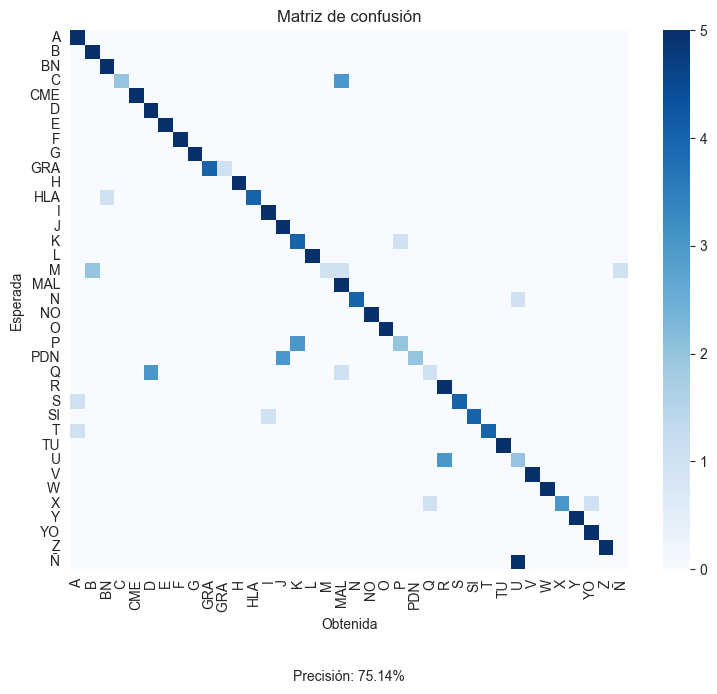

In [166]:
plt.figure(figsize=(9, 7))
sns.heatmap(confusion_matrix, cmap='Blues', fmt='g')
# Ajustar el tamaño del gráfico
# Agregar el título del gráfico
plt.title('Matriz de confusión')

# Agregar el porcentaje de aciertos en el gráfico
plt.text(0.5, -0.2, f'Precisión: {accuracy:.2%}', ha='center', va='center', transform=plt.gca().transAxes)

# Mostrar el gráfico
plt.show()

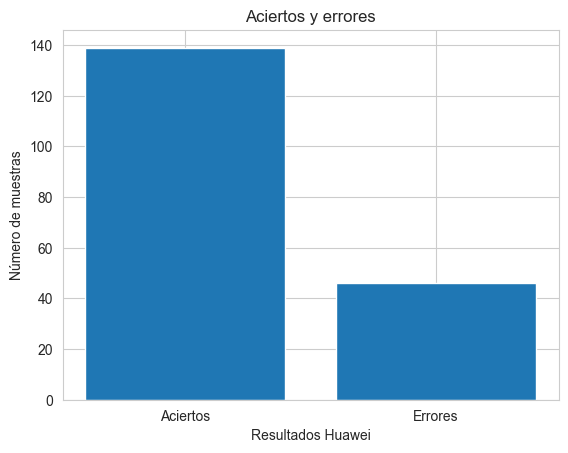

In [167]:
valores = [correct_predictions, incorrect_predictions]

# Crear una lista con las etiquetas de la gráfica
etiquetas = ['Aciertos', 'Errores']

# Crear la gráfica de barras
plt.bar(etiquetas, valores)

# Agregar título y etiquetas de los ejes
plt.title('Aciertos y errores')
plt.xlabel('Resultados Huawei')
plt.ylabel('Número de muestras')

# Mostrar la gráfica
plt.show()

In [168]:
from pandas import crosstab

# Crear una tabla cruzada para obtener la matriz de confusión
confusion_matrix = crosstab(df['SEÑA ESPERADA'], df['S8/5003'], rownames=['Esperada'], colnames=['Obtenida'])

# Calcular los aciertos y errores
total_samples = confusion_matrix.sum().sum()
correct_predictions = sum([confusion_matrix.iloc[i,i] for i in range(len(confusion_matrix))])
incorrect_predictions = total_samples - correct_predictions

# Calcular el porcentaje de aciertos
accuracy = correct_predictions / total_samples

# Imprimir la matriz de confusión y el porcentaje de aciertos
print('Matriz de confusión:\n', confusion_matrix)
print('Aciertos:', correct_predictions)
print('Errores:', incorrect_predictions)
print('Precisión:', accuracy)

Matriz de confusión:
 Obtenida  A  B  BN  C  CME  D  E  F  G  GRA  ...  T  TU  U  V  W  X  Y  YO  Z   
Esperada                                     ...                                
A         5  0   0  0    0  0  0  0  0    0  ...  0   0  0  0  0  0  0   0  0  \
B         0  5   0  0    0  0  0  0  0    0  ...  0   0  0  0  0  0  0   0  0   
BN        0  1   4  0    0  0  0  0  0    0  ...  0   0  0  0  0  0  0   0  0   
C         0  0   0  5    0  0  0  0  0    0  ...  0   0  0  0  0  0  0   0  0   
CME       0  0   0  0    5  0  0  0  0    0  ...  0   0  0  0  0  0  0   0  0   
D         0  0   0  0    0  5  0  0  0    0  ...  0   0  0  0  0  0  0   0  0   
E         0  0   0  0    0  0  4  0  0    0  ...  0   0  0  0  0  0  0   0  0   
F         0  0   0  0    0  0  0  5  0    0  ...  0   0  0  0  0  0  0   0  0   
G         0  0   0  0    0  0  0  0  5    0  ...  0   0  0  0  0  0  0   0  0   
GRA       0  0   0  0    0  0  0  0  0    5  ...  0   0  0  0  0  0  0   0  0   
H     

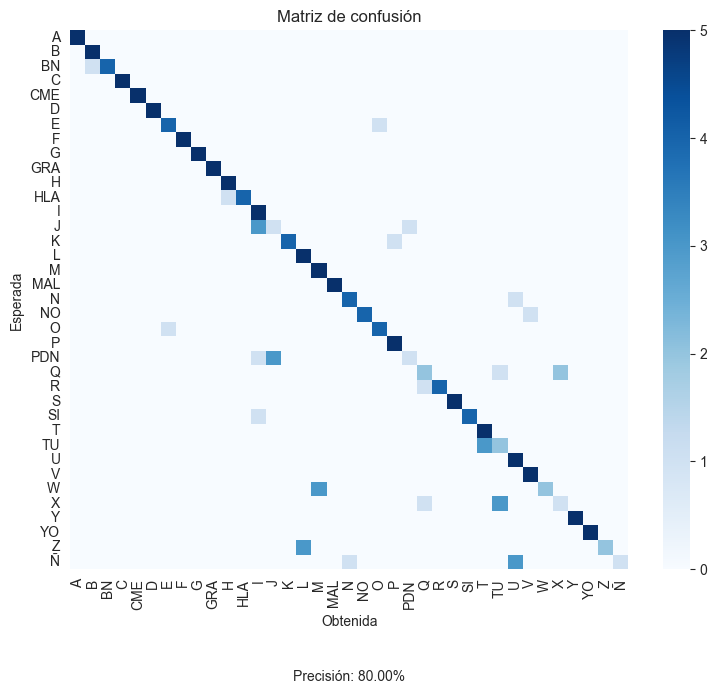

In [169]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(9, 7))
sns.heatmap(confusion_matrix, cmap='Blues', fmt='g')
# Ajustar el tamaño del gráfico
# Agregar el título del gráfico
plt.title('Matriz de confusión')

# Agregar el porcentaje de aciertos en el gráfico
plt.text(0.5, -0.2, f'Precisión: {accuracy:.2%}', ha='center', va='center', transform=plt.gca().transAxes)

# Mostrar el gráfico
plt.show()

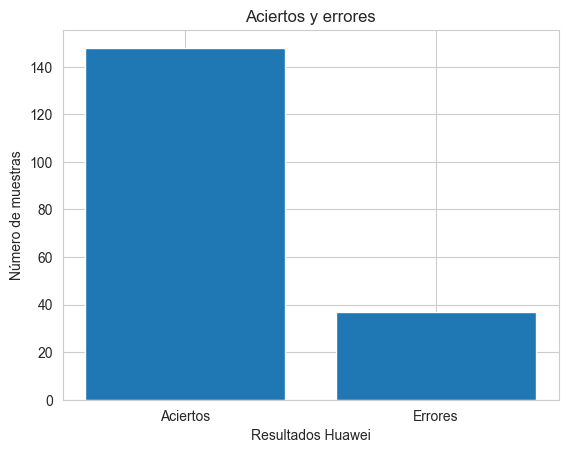

In [170]:
valores = [correct_predictions, incorrect_predictions]

# Crear una lista con las etiquetas de la gráfica
etiquetas = ['Aciertos', 'Errores']

# Crear la gráfica de barras
plt.bar(etiquetas, valores)

# Agregar título y etiquetas de los ejes
plt.title('Aciertos y errores')
plt.xlabel('Resultados Huawei')
plt.ylabel('Número de muestras')

# Mostrar la gráfica
plt.show()

In [171]:
from pandas import crosstab

# Crear una tabla cruzada para obtener la matriz de confusión
confusion_matrix = crosstab(df['SEÑA ESPERADA'], df['SAMSUNG-B/5000'], rownames=['Esperada'], colnames=['Obtenida'])

# Calcular los aciertos y errores
total_samples = confusion_matrix.sum().sum()
correct_predictions = sum([confusion_matrix.iloc[i,i] for i in range(len(confusion_matrix))])
incorrect_predictions = total_samples - correct_predictions

# Calcular el porcentaje de aciertos
accuracy = correct_predictions / total_samples

# Imprimir la matriz de confusión y el porcentaje de aciertos
print('Matriz de confusión:\n', confusion_matrix)
print('Aciertos:', correct_predictions)
print('Errores:', incorrect_predictions)
print('Precisión:', accuracy)

Matriz de confusión:
 Obtenida  A  B  BN  C  CME  D  E  F  G  GRA  ...  T  TU  U  V  W  X  Y  YO  Z   
Esperada                                     ...                                
A         5  0   0  0    0  0  0  0  0    0  ...  0   0  0  0  0  0  0   0  0  \
B         0  3   0  0    0  0  0  0  0    0  ...  0   0  0  0  0  0  0   0  0   
BN        0  0   5  0    0  0  0  0  0    0  ...  0   0  0  0  0  0  0   0  0   
C         0  0   0  5    0  0  0  0  0    0  ...  0   0  0  0  0  0  0   0  0   
CME       0  0   0  0    5  0  0  0  0    0  ...  0   0  0  0  0  0  0   0  0   
D         0  0   0  0    0  5  0  0  0    0  ...  0   0  0  0  0  0  0   0  0   
E         0  0   0  0    0  0  5  0  0    0  ...  0   0  0  0  0  0  0   0  0   
F         0  0   0  0    0  0  0  5  0    0  ...  0   0  0  0  0  0  0   0  0   
G         0  0   0  0    0  0  0  0  5    0  ...  0   0  0  0  0  0  0   0  0   
GRA       0  0   0  0    0  0  0  0  0    5  ...  0   0  0  0  0  0  0   0  0   
H     

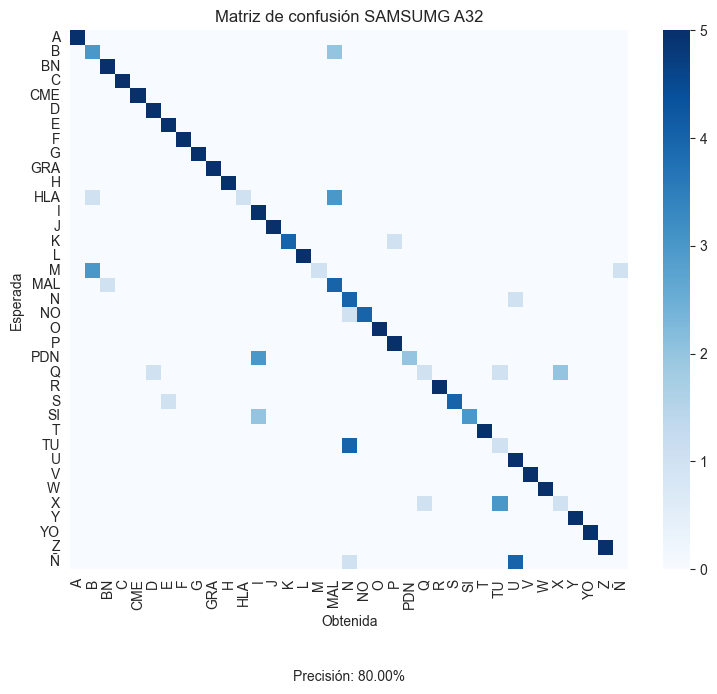

In [172]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(9, 7))
sns.heatmap(confusion_matrix, cmap='Blues', fmt='g')
# Ajustar el tamaño del gráfico
# Agregar el título del gráfico
plt.title('Matriz de confusión SAMSUMG A32')

# Agregar el porcentaje de aciertos en el gráfico
plt.text(0.5, -0.2, f'Precisión: {accuracy:.2%}', ha='center', va='center', transform=plt.gca().transAxes)

# Mostrar el gráfico
plt.show()

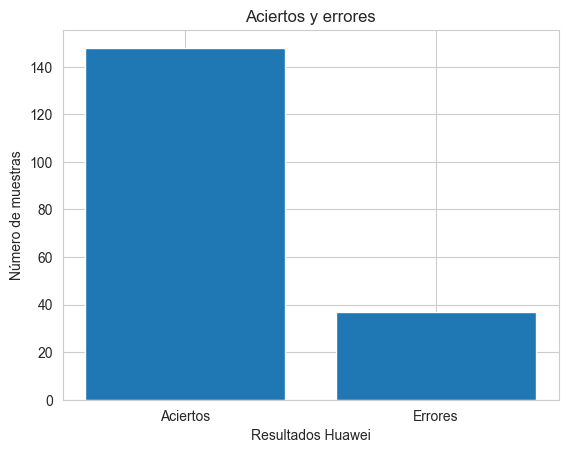

In [173]:
valores = [correct_predictions, incorrect_predictions]

# Crear una lista con las etiquetas de la gráfica
etiquetas = ['Aciertos', 'Errores']

# Crear la gráfica de barras
plt.bar(etiquetas, valores)

# Agregar título y etiquetas de los ejes
plt.title('Aciertos y errores')
plt.xlabel('Resultados Huawei')
plt.ylabel('Número de muestras')

# Mostrar la gráfica
plt.show()

In [174]:
from pandas import crosstab

# Crear una tabla cruzada para obtener la matriz de confusión
confusion_matrix = crosstab(df_sorted['SEÑA ESPERADA'], df_sorted['RESULTANTES'], rownames=['Esperada'], colnames=['Obtenida'])

# Calcular los aciertos y errores
total_samples = confusion_matrix.sum().sum()
correct_predictions = sum([confusion_matrix.iloc[i,i] for i in range(len(confusion_matrix))])
incorrect_predictions = total_samples - correct_predictions

# Calcular el porcentaje de aciertos
accuracy = correct_predictions / total_samples

# Imprimir la matriz de confusión y el porcentaje de aciertos
print('Matriz de confusión:\n', confusion_matrix)
print('Aciertos:', correct_predictions)
print('Errores:', incorrect_predictions)
print('Precisión:', accuracy)

Matriz de confusión:
 Obtenida   A   B  BN   C  CME   D   E   F   G  GRA  ...   T  TU   U   V  W  X   
Esperada                                            ...                         
A         15   0   0   0    0   0   0   0   0    0  ...   0   0   0   0  0  0  \
B          0  15   0   0    0   0   0   0   0    0  ...   0   0   0   0  0  0   
BN         0   3  12   0    0   0   0   0   0    0  ...   0   0   0   0  0  0   
C          0   0   0  15    0   0   0   0   0    0  ...   0   0   0   0  0  0   
CME        0   0   0   0   15   0   0   0   0    0  ...   0   0   0   0  0  0   
D          0   0   0   0    0  15   0   0   0    0  ...   0   0   0   0  0  0   
E          0   0   0   0    0   0  12   0   0    0  ...   0   0   0   0  0  0   
F          0   0   0   0    0   0   0  15   0    0  ...   0   0   0   0  0  0   
G          0   0   0   0    0   0   0   0  15    0  ...   0   0   0   0  0  0   
GRA        0   0   0   0    0   0   0   0   0   15  ...   0   0   0   0  0  0   
H     

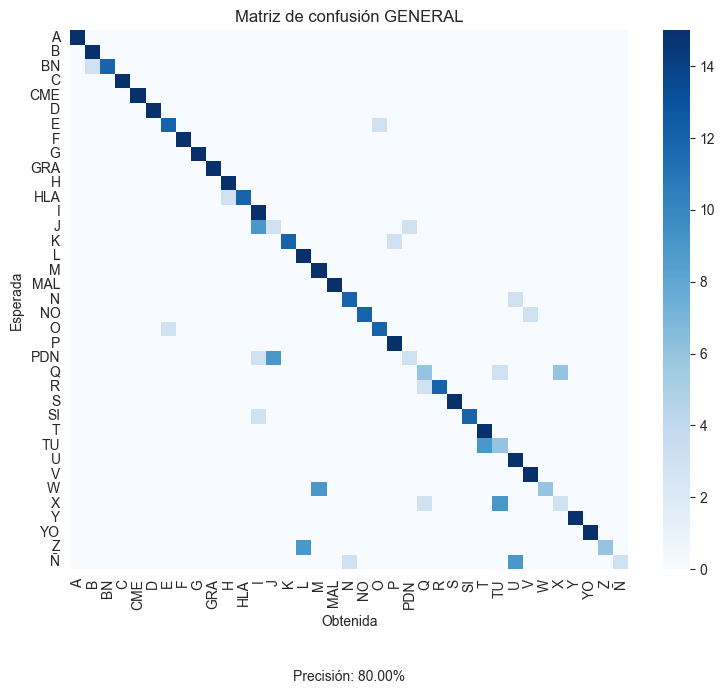

In [175]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(9, 7))
sns.heatmap(confusion_matrix, cmap='Blues', fmt='g')
# Ajustar el tamaño del gráfico
# Agregar el título del gráfico
plt.title('Matriz de confusión GENERAL')

# Agregar el porcentaje de aciertos en el gráfico
plt.text(0.5, -0.2, f'Precisión: {accuracy:.2%}', ha='center', va='center', transform=plt.gca().transAxes)

# Mostrar el gráfico
plt.show()

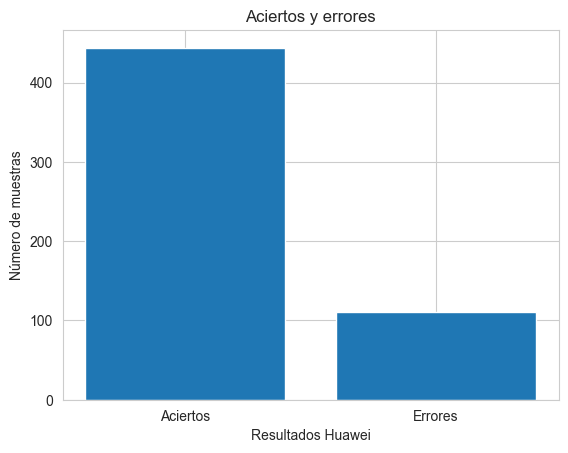

In [176]:
# Mostrar el gráfico
plt.show()
valores = [correct_predictions, incorrect_predictions]

# Crear una lista con las etiquetas de la gráfica
etiquetas = ['Aciertos', 'Errores']

# Crear la gráfica de barras
plt.bar(etiquetas, valores)

# Agregar título y etiquetas de los ejes
plt.title('Aciertos y errores')
plt.xlabel('Resultados Huawei')
plt.ylabel('Número de muestras')

# Mostrar la gráfica
plt.show()

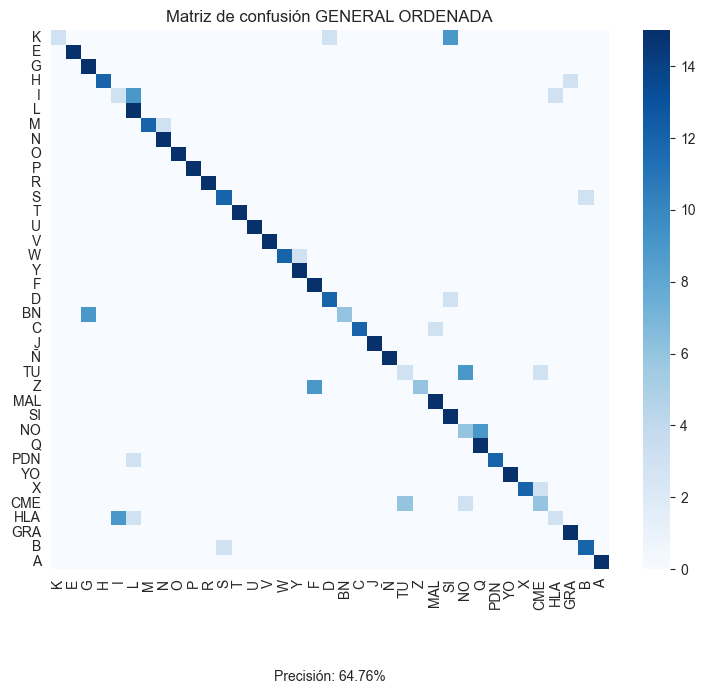

In [291]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

labels = df_sorted['SEÑA ESPERADA'].unique()  # Obtener los valores únicos en la columna 'SEÑA ESPERADA'
confusion_matrix_sorted = confusion_matrix(df_sorted['SEÑA ESPERADA'], df_sorted['RESULTANTES'])

plt.figure(figsize=(9, 7))
order = confusion_matrix_sorted.sum(axis=1).argsort()[::-1]
heatmap = sns.heatmap(confusion_matrix_sorted[order, :][:, order], cmap='Blues', fmt='g')

# Obtener las etiquetas ordenadas según el orden de la matriz de confusión
ordered_labels = [labels[i] for i in order]
# Configurar las etiquetas en los ejes x e y del mapa de calor
heatmap.set_xticklabels(ordered_labels)
heatmap.set_yticklabels(ordered_labels)

# Ajustar el tamaño del gráfico
# Agregar el título del gráfico
plt.title('Matriz de confusión GENERAL ORDENADA')

# Agregar el porcentaje de aciertos en el gráfico
plt.text(0.5, -0.2, f'Precisión: {accuracy:.2%}', ha='center', va='center', transform=plt.gca().transAxes)

# Mostrar el gráfico
plt.show()


In [205]:
import pandas as pd
from sklearn.metrics import confusion_matrix

labels = df_sorted['SEÑA ESPERADA'].unique()  # Obtener los valores únicos en la columna 'SEÑA ESPERADA'
confusion_matrix_sorted = confusion_matrix(df_sorted['SEÑA ESPERADA'], df_sorted['RESULTANTES'])

# Crear un DataFrame a partir de la matriz de confusión
df_confusion = pd.DataFrame(confusion_matrix_sorted, index=labels, columns=labels)

# Imprimir el DataFrame
print(df_confusion)


      A   Y   W   V   U   T   S   R   P   O  ...   Q  NO  SI  MAL  Z  TU   Ñ   
A    15   0   0   0   0   0   0   0   0   0  ...   0   0   0    0  0   0   0  \
Y     0  15   0   0   0   0   0   0   0   0  ...   0   0   0    0  0   0   0   
W     0   3  12   0   0   0   0   0   0   0  ...   0   0   0    0  0   0   0   
V     0   0   0  15   0   0   0   0   0   0  ...   0   0   0    0  0   0   0   
U     0   0   0   0  15   0   0   0   0   0  ...   0   0   0    0  0   0   0   
T     0   0   0   0   0  15   0   0   0   0  ...   0   0   0    0  0   0   0   
S     0   0   0   0   0   0  12   0   0   0  ...   0   0   0    0  0   0   0   
R     0   0   0   0   0   0   0  15   0   0  ...   0   0   0    0  0   0   0   
P     0   0   0   0   0   0   0   0  15   0  ...   0   0   0    0  0   0   0   
O     0   0   0   0   0   0   0   0   0  15  ...   0   0   0    0  0   0   0   
N     0   0   0   0   0   0   0   0   0   0  ...   0   0   0    0  0   0   0   
M     0   0   0   0   0   0   0   0   0 

In [290]:
from pandas import crosstab

# Crear una tabla cruzada para obtener la matriz de confusión
confusion_matrix = crosstab(estaticas['SEÑA ESPERADA'], estaticas['RESULTANTES'], rownames=['Esperada'], colnames=['Obtenida'])

# Calcular los aciertos y errores
total_samples = confusion_matrix.sum().sum()
correct_predictions = sum([confusion_matrix.iloc[i,i] for i in range(len(confusion_matrix))])
incorrect_predictions = total_samples - correct_predictions

# Calcular el porcentaje de aciertos
accuracy = correct_predictions / total_samples

# Imprimir la matriz de confusión y el porcentaje de aciertos
print('Matriz de confusión:\n', confusion_matrix)
print('Aciertos:', correct_predictions)
print('Errores:', incorrect_predictions)
print('Precisión:', accuracy)

Matriz de confusión:
 Obtenida   A   B   C   D   E   F   G   H   I   L  ...   O   P  Q   R   S   T   
Esperada                                          ...                          
A         15   0   0   0   0   0   0   0   0   0  ...   0   0  0   0   0   0  \
B          0  15   0   0   0   0   0   0   0   0  ...   0   0  0   0   0   0   
C          0   0  15   0   0   0   0   0   0   0  ...   0   0  0   0   0   0   
D          0   0   0  15   0   0   0   0   0   0  ...   0   0  0   0   0   0   
E          0   0   0   0  12   0   0   0   0   0  ...   3   0  0   0   0   0   
F          0   0   0   0   0  15   0   0   0   0  ...   0   0  0   0   0   0   
G          0   0   0   0   0   0  15   0   0   0  ...   0   0  0   0   0   0   
H          0   0   0   0   0   0   0  15   0   0  ...   0   0  0   0   0   0   
I          0   0   0   0   0   0   0   0  15   0  ...   0   0  0   0   0   0   
L          0   0   0   0   0   0   0   0   0  15  ...   0   0  0   0   0   0   
M          0   0  

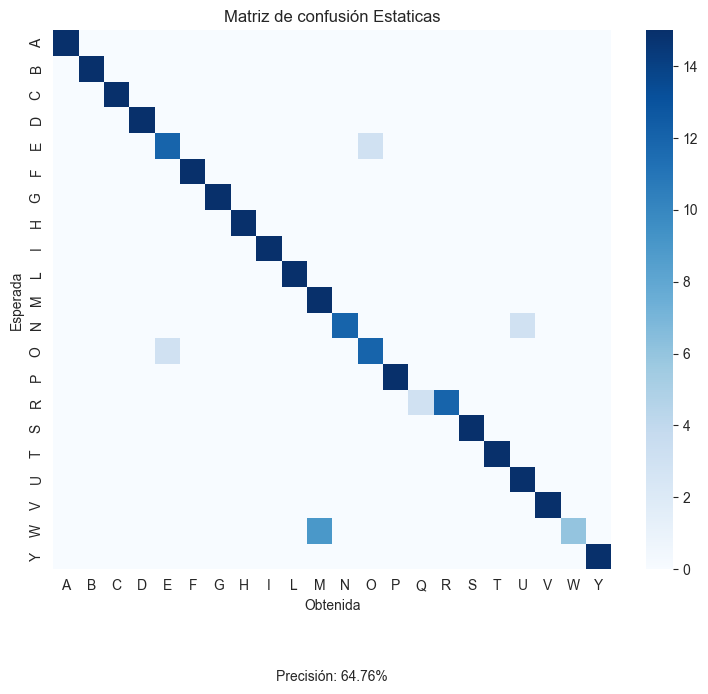

In [275]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(9, 7))
sns.heatmap(confusion_matrix, cmap='Blues', fmt='g')
# Ajustar el tamaño del gráfico
# Agregar el título del gráfico
plt.title('Matriz de confusión Estaticas')

# Agregar el porcentaje de aciertos en el gráfico
plt.text(0.5, -0.2, f'Precisión: {accuracy:.2%}', ha='center', va='center', transform=plt.gca().transAxes)

# Mostrar el gráfico
plt.show()

In [296]:
from pandas import crosstab

# Crear una tabla cruzada para obtener la matriz de confusión
confusion_matrix = crosstab(dinamicas['SEÑA ESPERADA'], dinamicas['RESULTANTES'], rownames=['Esperada'], colnames=['Obtenida'])

# Calcular los aciertos y errores
total_samples = confusion_matrix.sum().sum()
correct_predictions = sum([confusion_matrix.iloc[i,i] for i in range(len(confusion_matrix))])
incorrect_predictions = total_samples - correct_predictions

# Calcular el porcentaje de aciertos
accuracy = correct_predictions / total_samples

# Imprimir la matriz de confusión y el porcentaje de aciertos
print('Matriz de confusión:\n', confusion_matrix)
print('Aciertos:', correct_predictions)
print('Errores:', incorrect_predictions)
print('Precisión:', accuracy)

Matriz de confusión:
 Obtenida  B  BN  CME  GRA  H  HLA  I  J   K  L  ...  Q  SI  T  TU  U  V  X   
Esperada                                        ...                          
BN        3  12    0    0  0    0  0  0   0  0  ...  0   0  0   0  0  0  0  \
CME       0   0   15    0  0    0  0  0   0  0  ...  0   0  0   0  0  0  0   
GRA       0   0    0   15  0    0  0  0   0  0  ...  0   0  0   0  0  0  0   
HLA       0   0    0    0  3   12  0  0   0  0  ...  0   0  0   0  0  0  0   
J         0   0    0    0  0    0  9  3   0  0  ...  0   0  0   0  0  0  0   
K         0   0    0    0  0    0  0  0  12  0  ...  0   0  0   0  0  0  0   
MAL       0   0    0    0  0    0  0  0   0  0  ...  0   0  0   0  0  0  0   
NO        0   0    0    0  0    0  0  0   0  0  ...  0   0  0   0  0  3  0   
PDN       0   0    0    0  0    0  3  9   0  0  ...  0   0  0   0  0  0  0   
Q         0   0    0    0  0    0  0  0   0  0  ...  6   0  0   3  0  0  6   
SI        0   0    0    0  0    0  3  0   

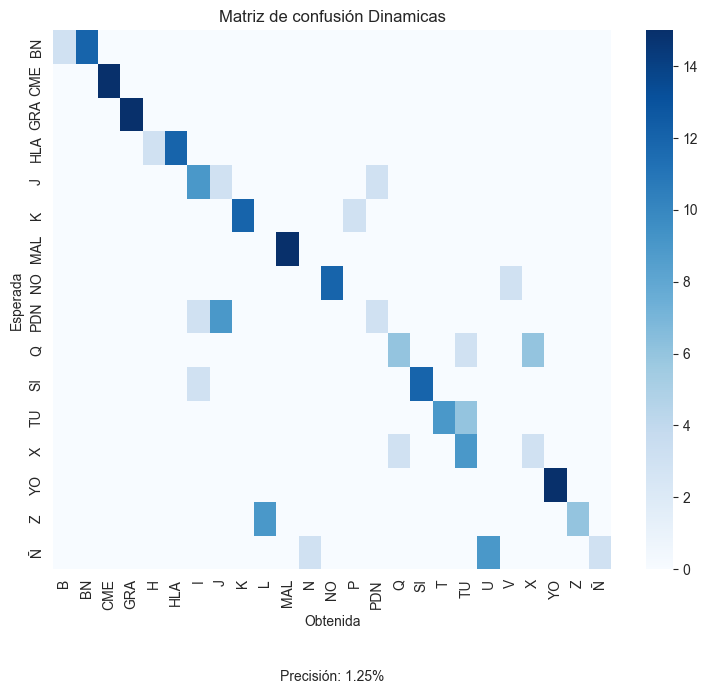

In [297]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(9, 7))
sns.heatmap(confusion_matrix, cmap='Blues', fmt='g')
# Ajustar el tamaño del gráfico
# Agregar el título del gráfico
plt.title('Matriz de confusión Dinamicas')

# Agregar el porcentaje de aciertos en el gráfico
plt.text(0.5, -0.2, f'Precisión: {accuracy:.2%}', ha='center', va='center', transform=plt.gca().transAxes)

# Mostrar el gráfico
plt.show()

**ACCURACY**

In [285]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [286]:
accuracy_score(df_acc['SEÑA ESPERADA'], df_acc['HUAWEI/5001'])

0.8162162162162162

In [287]:
accuracy_score(cm_general2['SEÑA ESPERADA'], cm_general2['RESULTANTES'])

0.8

In [288]:
accuracy_score(estaticas['SEÑA ESPERADA'], estaticas['RESULTANTES'])

0.9333333333333333

In [289]:
accuracy_score(dinamicas['SEÑA ESPERADA'], dinamicas['RESULTANTES'])

0.625

**PRECISION**

In [227]:
def prec(df):
    preci = precision_score(df['SEÑA ESPERADA'], df['RESULTANTES'], average='micro')
    print(preci)


In [229]:
def prec_ind(df, marca):
    preci = precision_score(df['SEÑA ESPERADA'], df[marca], average='micro')
    print(preci)


In [230]:
prec_ind(df_acc, 'HUAWEI/5001')

0.8162162162162162


In [231]:
prec_ind(df_acc, 'SAMSUNG-B/5000')


0.8


In [232]:
prec_ind(df_acc, 'S8/5003')


0.8


In [239]:
print("Precision General: ")
prec(cm_general2)

Precision General: 
0.8


In [240]:
print("Precision Estaticas")
prec(estaticas)

Precision Estaticas
0.9333333333333333


In [241]:
print("Precision Dinamicas")
prec(dinamicas)

Precision Dinamicas
0.625


**RECALL**

In [226]:
recall_score(cm_general2['SEÑA ESPERADA'], cm_general2['RESULTANTES'], average=None)


array([1. , 1. , 0.8, 1. , 1. , 1. , 0.8, 1. , 1. , 1. , 1. , 0.8, 1. ,
       0.2, 0.8, 1. , 1. , 1. , 0.8, 0.8, 0.8, 1. , 0.2, 0.4, 0.8, 1. ,
       0.8, 1. , 0.4, 1. , 1. , 0.4, 0.2, 1. , 1. , 0.4, 0.2])

In [84]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder

In [85]:
label = LabelEncoder()

In [97]:
y = label.fit_transform(df_sorted['SEÑA ESPERADA'])

In [98]:
y

array([ 0, 33, 31, 30, 29, 27, 25, 24, 21, 20, 18, 16, 15, 12, 10,  8,  7,
        6,  5,  3,  1,  0,  0, 33,  1,  5,  5,  3,  1,  0, 33, 31, 30, 29,
       27, 25, 24, 21, 20, 18, 16, 15, 12, 10,  8,  7,  6,  3,  6, 31, 29,
       18, 16, 15, 12, 10,  8,  7,  6,  5,  3,  1,  0, 33, 31, 30, 29, 27,
       25, 24, 21, 20, 20, 30, 21, 25, 27, 25, 24, 21, 20, 16, 15, 12, 10,
        8,  7,  6,  5,  3,  1,  0, 33, 31, 30, 29, 27, 24,  7,  8, 10, 27,
       25, 24, 21, 20, 18, 16, 15, 12, 10,  8,  7,  6,  5,  3,  1,  0, 33,
       31, 30, 29, 29, 27, 30, 33, 33, 31, 30, 29, 27, 25, 24, 21, 20, 18,
       16, 15, 12, 10,  8,  7,  6,  5,  3,  1,  0, 31, 25, 24, 21, 10,  8,
        7,  6,  5,  3,  1,  0, 33, 31, 30, 29, 27, 25, 24, 21, 20, 18, 16,
       15, 12, 12, 15, 16, 18, 20, 18, 16, 15, 12, 10,  8,  7,  6,  5, 18,
        3,  0, 33, 31, 30, 29, 27, 25, 24, 21, 20,  1, 16, 18,  8,  3, 33,
        1,  0, 27,  0,  1, 29,  3, 31, 30, 33,  5, 33,  6, 29,  7,  8, 31,
       30, 29, 10, 31, 18

In [99]:
y_pred =  label.fit_transform(df_sorted['RESULTANTES'])

In [100]:
y_pred

array([ 0, 33, 16, 30, 29, 27, 25, 24, 21, 20, 18, 16, 15, 12, 10,  8,  7,
        6,  5,  3,  1,  0,  0, 33,  1,  5,  5,  3,  1,  0, 33, 31, 30, 29,
       27, 25, 23, 21, 20, 29, 16, 15, 12, 10,  8,  7, 20,  3,  6, 16, 29,
       18, 16, 15, 12, 10,  8,  7,  6,  5,  3,  1,  0, 33, 16, 30, 29, 27,
       25, 24, 21, 20,  6, 30, 21, 25, 27, 25, 24, 21, 20, 16, 15, 12, 10,
        8,  7,  6,  5,  3,  1,  0, 33, 31, 30, 29, 27, 24,  7,  8, 10, 27,
       25, 24, 21, 20, 18, 16, 15, 12, 10,  8,  7,  6,  5,  3,  1,  0, 33,
       16, 30, 29, 29, 27, 30, 33, 33, 31, 30, 29, 27, 25, 23, 21, 20, 29,
       16, 15, 12, 10,  8,  7, 20,  5,  3,  1,  0, 16, 25, 24, 21, 10,  8,
        7,  6,  5,  3,  1,  0, 33, 16, 30, 29, 27, 25, 24, 21, 20, 18, 16,
       15, 12, 12, 15, 16, 18, 20, 18, 16, 15, 12, 10,  8,  7,  6,  5, 18,
        3,  0, 33, 31, 30, 29, 27, 25, 24, 21,  6,  1, 16, 18,  8,  3, 33,
        1,  0, 27,  0,  1, 29,  3, 16, 30, 33,  5, 33, 20, 29,  7,  8, 16,
       30, 29, 10, 31, 18

In [104]:
roc_auc_score(y, y_pred, multi_class='ovr')

AxisError: axis 1 is out of bounds for array of dimension 1

In [77]:
#Parte 4
df3 = df2.copy()
#Sumar incidencias por seña para cada celular
grouped_data = df3.groupby('SEÑA ESPERADA').sum()
grouped_data= pd.DataFrame(grouped_data)
grouped_data['TOTAL ESPERADOS'] = 15

In [78]:
grouped_data['precision'] =  grouped_data['HUAWEI/5001'] + grouped_data['S8/5003'] + grouped_data['SAMSUNG-B/5000'] 

In [79]:
grouped_data['precision'] =  grouped_data['precision'] / grouped_data['TOTAL ESPERADOS'] * 100  


In [80]:
#Precision general por seña
grouped_data['precision'] = grouped_data['precision'].apply(lambda x: round(x, 2))
grouped_data.precision

SEÑA ESPERADA
A      100.00
B       86.67
BN      93.33
C       80.00
CME    100.00
D      100.00
E       93.33
F      100.00
G      100.00
GRA     93.33
H      100.00
HLA     60.00
I      100.00
J       73.33
K       80.00
L      100.00
M       46.67
MAL     93.33
N       80.00
NO      86.67
O       93.33
P       80.00
PDN     33.33
Q       26.67
R       93.33
S       86.67
SI      73.33
T       93.33
TU      53.33
U       80.00
V      100.00
W       80.00
X       33.33
Y      100.00
YO     100.00
Z       80.00
Ñ        6.67
Name: precision, dtype: float64

In [81]:
grouped_data

,HUAWEI/5001,DISTANCIA TOTAL,#INCIDENCIAS,FALSAS,SAMSUNG-B/5000,DISTANCIA TOTAL.1,#INCIDENCIAS.1,FALSAS.1,S8/5003,DISTANCIA TOTAL.2,#INCIDENCIAS.2,FALSAS.2,Tipo,TOTAL ESPERADOS,precision
SEÑA ESPERADA,,,,,,,,,,,,,,,
A,5,5.061517e+05,50,E/S/TS/TE/S/TE/S/TC/S/T,5,4.430950e+05,46,E/STE/SE/SC/S/T,5,4.786245e+05,46,E/SS/TE/SE/SE/S/T,0,15,100.00
B,5,3.183026e+05,48,HLA/M/MAL0HLA/MALHLA/M/MAL0,3,3.560399e+05,46,"F/HLA/MAL,M0F/MF/HLA/MAL,M0",5,3.665895e+05,42,F/HLA/M/MAL0F/HLA/M/MALF/HLA/M/MAL0,0,15,86.67
BN,5,5.801136e+05,45,B/HLA/ÑM/MAL/ÑB/HLA/ÑB/HLA/ÑB/F/M/MAL/O/V,5,4.302006e+05,37,BN/HLA/M/MALB/M/MALBN/HLA/M/MALBN/HLA/M/MALB/MAL,4,4.947558e+05,43,B/HLA/MAL/ÑBN/HLA/M/NB/MAL/ÑB/HLA/MAL/ÑB/MAL,5,15,93.33
C,2,3.797425e+05,43,M/C/O/Ñ0M/O/ÑM/C/O/ÑM,5,3.537585e+05,48,M/MAL/O/Ñ0M/MAL/O/ÑM/MAL/O/ÑM,5,4.671643e+05,50,M/MAL/O/Ñ0M/MAL/O/ÑM/MAL/O/ÑM,0,15,80.00
CME,5,1.915784e+06,62,0A/Z00O,5,1.284350e+06,61,B0BBO,5,1.922486e+06,62,0A00O,5,15,100.00
D,5,7.870783e+05,64,0Z000,5,6.116143e+05,63,0000O,5,7.150149e+05,62,0Z00Z,0,15,100.00
E,5,5.838656e+05,45,OA/D/E/I/N/O/TOOC/O/S,5,6.219022e+05,54,A0AAO/S/SI,4,3.268881e+05,58,0000C/E/S/SI,0,15,93.33
F,5,4.060792e+05,57,00000,5,4.736113e+05,65,00000,5,6.786768e+05,65,00000,0,15,100.00
G,5,5.325505e+05,56,YOYOYOYOX/YO,5,4.629168e+05,55,"L,YO0L,YOL,YOX/YO",5,5.775098e+05,60,0YO00YO,0,15,100.00


In [37]:
grouped_data[['FALSAS','FALSAS.1','FALSAS.2']] = df_data[['FALSAS','FALSAS.1','FALSAS.2']].astype(str).apply(lambda x: x.str.count('/'))

In [38]:
signTypes_df =  grouped_data.copy()

In [39]:
signTypes = [0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,1,0,1,0,0,1,1,0,0,1,0,1,0,0,0,1,0,1,1,1]

In [40]:
grouped_data['Tipo'] =  signTypes

In [41]:
grouped_data

,HUAWEI/5001,DISTANCIA TOTAL,#INCIDENCIAS,FALSAS,SAMSUNG-B/5000,DISTANCIA TOTAL.1,#INCIDENCIAS.1,FALSAS.1,S8/5003,DISTANCIA TOTAL.2,#INCIDENCIAS.2,FALSAS.2,TOTAL ESPERADOS,precision,Tipo
SEÑA ESPERADA,,,,,,,,,,,,,,,
A,5,5.061517e+05,50,NaN,5,4.430950e+05,46,NaN,5,4.786245e+05,46,NaN,15,100.00,0
B,5,3.183026e+05,48,NaN,3,3.560399e+05,46,NaN,5,3.665895e+05,42,NaN,15,86.67,0
BN,5,5.801136e+05,45,NaN,5,4.302006e+05,37,NaN,4,4.947558e+05,43,NaN,15,93.33,1
C,2,3.797425e+05,43,NaN,5,3.537585e+05,48,NaN,5,4.671643e+05,50,NaN,15,80.00,0
CME,5,1.915784e+06,62,NaN,5,1.284350e+06,61,NaN,5,1.922486e+06,62,NaN,15,100.00,1
D,5,7.870783e+05,64,NaN,5,6.116143e+05,63,NaN,5,7.150149e+05,62,NaN,15,100.00,0
E,5,5.838656e+05,45,NaN,5,6.219022e+05,54,NaN,4,3.268881e+05,58,NaN,15,93.33,0
F,5,4.060792e+05,57,NaN,5,4.736113e+05,65,NaN,5,6.786768e+05,65,NaN,15,100.00,0
G,5,5.325505e+05,56,NaN,5,4.629168e+05,55,NaN,5,5.775098e+05,60,NaN,15,100.00,0


In [42]:
signTypes_df.drop(columns=['FALSAS', 'FALSAS.1', 'FALSAS.2'], inplace=True)

In [43]:
signTypes_df

,HUAWEI/5001,DISTANCIA TOTAL,#INCIDENCIAS,SAMSUNG-B/5000,DISTANCIA TOTAL.1,#INCIDENCIAS.1,S8/5003,DISTANCIA TOTAL.2,#INCIDENCIAS.2,TOTAL ESPERADOS,precision,Tipo
SEÑA ESPERADA,,,,,,,,,,,,
A,5,5.061517e+05,50,5,4.430950e+05,46,5,4.786245e+05,46,15,100.00,0
B,5,3.183026e+05,48,3,3.560399e+05,46,5,3.665895e+05,42,15,86.67,0
BN,5,5.801136e+05,45,5,4.302006e+05,37,4,4.947558e+05,43,15,93.33,1
C,2,3.797425e+05,43,5,3.537585e+05,48,5,4.671643e+05,50,15,80.00,0
CME,5,1.915784e+06,62,5,1.284350e+06,61,5,1.922486e+06,62,15,100.00,1
D,5,7.870783e+05,64,5,6.116143e+05,63,5,7.150149e+05,62,15,100.00,0
E,5,5.838656e+05,45,5,6.219022e+05,54,4,3.268881e+05,58,15,93.33,0
F,5,4.060792e+05,57,5,4.736113e+05,65,5,6.786768e+05,65,15,100.00,0
G,5,5.325505e+05,56,5,4.629168e+05,55,5,5.775098e+05,60,15,100.00,0


In [51]:
signGroup = signTypes_df.groupby('Tipo')

Index(['HUAWEI/5001', 'DISTANCIA TOTAL', '#INCIDENCIAS', 'SAMSUNG-B/5000',
       'DISTANCIA TOTAL.1', '#INCIDENCIAS.1', 'S8/5003', 'DISTANCIA TOTAL.2',
       '#INCIDENCIAS.2', 'TOTAL ESPERADOS', 'precision', 'Tipo'],
      dtype='object')

In [52]:
signGroup.count()

In [53]:
signGroup.sum()

,HUAWEI/5001,DISTANCIA TOTAL,#INCIDENCIAS,SAMSUNG-B/5000,DISTANCIA TOTAL.1,#INCIDENCIAS.1,S8/5003,DISTANCIA TOTAL.2,#INCIDENCIAS.2,TOTAL ESPERADOS,precision
Tipo,,,,,,,,,,,
0,21,21,21,21,21,21,21,21,21,21,21
1,16,16,16,16,16,16,16,16,16,16,16


In [54]:
signGroup.var()

,HUAWEI/5001,DISTANCIA TOTAL,#INCIDENCIAS,SAMSUNG-B/5000,DISTANCIA TOTAL.1,#INCIDENCIAS.1,S8/5003,DISTANCIA TOTAL.2,#INCIDENCIAS.2,TOTAL ESPERADOS,precision
Tipo,,,,,,,,,,,
0,89,1.019348e+07,998,97,9.219875e+06,1027,98,1.113490e+07,1017,315,1893.33
1,62,9.444683e+06,676,51,8.166923e+06,679,50,9.899093e+06,682,240,1086.65
